# Análisis de texto en Facebook
El programa de radio "El Bueno La mala y el feo" presento una caída en los link clicks en su página de facebook en julio de 2020 vs el mes anterior, con este análisis de texto queremos analizar el contenido y encontrar si la subjetividad en los contenidos o los temas incidieron en la caída.

In [7]:
import pandas as pd
import requests
import json


## Traer los datos desde el API

In [2]:
#Key
keys = pd.read_csv(r"desktop/archivos/keys2.csv", sep=',', header=None)
headers = dict(zip(keys[0],keys[1]))


In [3]:
#El API permite consultar 50 publicaciones de facebook por página
#vamos a comparar junio vs julio.
#página 1
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data1 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 1
}
post = requests.post(url, headers=headers, json = data1)
post.status_code

200

In [4]:
#result
data1 = post.json()
print(data1)

{'data': [{'content_category': 'VIDEO', 'text': '¡Qué miedo! 👻', 'perma_link': 'https://www.facebook.com/554069604681993/posts/3416516085103983/', 'metrics': {'lifetime.post_link_clicks': 12}, 'created_time': '2020-08-01T01:10:00Z'}, {'content_category': 'LINK', 'text': '¿Piensas viajar en avión próximamente?... ¡Ojo! ⚠✈ La #OMS dice que solo se debe hacer en unos pocos casos extremos. Entérate de cuáles serían las excepciones ⬇', 'perma_link': 'https://www.facebook.com/554069604681993/posts/3415900708498854/', 'metrics': {'lifetime.post_link_clicks': 1489}, 'created_time': '2020-08-01T00:10:46Z'}, {'content_category': 'LINK', 'text': '¿El tequila fortalece los huesos? 🤔 Un estudio lo confirma y nos dice cuál es el que podría contener esas sustancias 🥃', 'perma_link': 'https://www.facebook.com/554069604681993/posts/3416086165146975/', 'metrics': {'lifetime.post_link_clicks': 986}, 'created_time': '2020-07-31T23:10:03Z'}, {'content_category': 'VIDEO', 'text': 'Alguien que le de un Conse

In [5]:

data1 = pd.json_normalize(data1['data'])
print(f"Tenemos {data1.shape[0]:,d} documentos.")
data1.head()        


Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,VIDEO,¡Qué miedo! 👻,https://www.facebook.com/554069604681993/posts...,2020-08-01T01:10:00Z,12.0
1,LINK,¿Piensas viajar en avión próximamente?... ¡Ojo...,https://www.facebook.com/554069604681993/posts...,2020-08-01T00:10:46Z,1489.0
2,LINK,¿El tequila fortalece los huesos? 🤔 Un estudio...,https://www.facebook.com/554069604681993/posts...,2020-07-31T23:10:03Z,986.0
3,VIDEO,Alguien que le de un Consejo a El Feo Andres,https://www.facebook.com/554069604681993/posts...,2020-07-31T22:57:38Z,NaN
4,LINK,¡CONFIRMADO! 8⃣ jugadores de las #Chivas fuero...,https://www.facebook.com/554069604681993/posts...,2020-07-31T22:10:18Z,911.0


In [6]:
#pag 2
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data2 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 2
}
post = requests.post(url, headers=headers, json = data2)
#result
data2 = post.json()
data2 = pd.json_normalize(data2['data'])
print(f"Tenemos {data2.shape[0]:,d} documentos.")
data2.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,¿Qué rollo? 👻 Un profesor ni cuenta se dió que...,https://www.facebook.com/554069604681993/posts...,2020-07-27T23:00:17Z,4166.0
1,LINK,¡¿Solo eso se llevó?! 🙈 Este sujeto se hizo vi...,https://www.facebook.com/554069604681993/posts...,2020-07-27T21:30:45Z,3225.0
2,PHOTO,¿A poco no es cierto? 😂😂😂,https://www.facebook.com/buenomalafeo/photos/a...,2020-07-27T20:30:13Z,NaN
3,LINK,¡Se cayó el muro de #Trump! 😳 Mira cómo la #To...,https://www.facebook.com/554069604681993/posts...,2020-07-27T18:30:34Z,13975.0
4,VIDEO,Esta semana en #UforiaHangoutSessions nos acom...,https://www.facebook.com/554069604681993/posts...,2020-07-27T17:00:53Z,57.0


In [7]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data3 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 3
}
post = requests.post(url, headers=headers, json = data3)
#result
data3 = post.json()
data3 = pd.json_normalize(data3['data'])
print(f"Tenemos {data3.shape[0]:,d} documentos.")
data3.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,¿Qué es el 'síndrome de la cabaña'? 🤔 Una expe...,https://www.facebook.com/554069604681993/posts...,2020-07-23T12:30:05Z,1053.0
1,LINK,#AureaMiranda fue acusada de hacer nudismo en ...,https://www.facebook.com/554069604681993/posts...,2020-07-23T02:00:15Z,4520.0
2,VIDEO,"""Mi apá fue bien alcohólico, pero yo fui peor""...",https://www.facebook.com/554069604681993/posts...,2020-07-23T00:30:00Z,27.0
3,LINK,¡Todo era plan con maña! 👨‍🔧❤ Conoce a cuántas...,https://www.facebook.com/554069604681993/posts...,2020-07-22T23:00:12Z,103.0
4,LINK,¿Cuándo viene y quiénes califican? 🤔 Aquí te c...,https://www.facebook.com/554069604681993/posts...,2020-07-22T21:30:22Z,13697.0


In [8]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data4 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 4
}
post = requests.post(url, headers=headers, json = data4)
#result
data4 = post.json()
data4 = pd.json_normalize(data4['data'])
print(f"Tenemos {data4.shape[0]:,d} documentos.")
data4.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,¡La 'Reina Grupera' está comprometida por terc...,https://www.facebook.com/554069604681993/posts...,2020-07-18T16:00:28Z,2207.0
1,LINK,¡Todavía salió delicado el señor! 😯 Estaba pid...,https://www.facebook.com/554069604681993/posts...,2020-07-18T14:30:11Z,1095.0
2,LINK,¡¿Qué tanto les molesta que pongan su puesto?!...,https://www.facebook.com/554069604681993/posts...,2020-07-18T13:00:41Z,1851.0
3,VIDEO,"""Intento lograr estar a su nivel"": Camilo alab...",https://www.facebook.com/554069604681993/posts...,2020-07-18T03:00:02Z,16.0
4,LINK,¡Es más fácil de lo que te puedas imaginar! 😉 ...,https://www.facebook.com/554069604681993/posts...,2020-07-18T02:00:54Z,335.0


In [9]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data5 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 5
}
post = requests.post(url, headers=headers, json = data5)
#result
data5 = post.json()
data5 = pd.json_normalize(data5['data'])
print(f"Tenemos {data5.shape[0]:,d} documentos.")
data5.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,PHOTO,¡Buenos días! ✌️ Escúchanos a cualquier hora d...,https://www.facebook.com/buenomalafeo/photos/a...,2020-07-14T15:30:15Z,36.0
1,LINK,🎥 ¡Ella es la víbora toca timbres! 😅 Un vato n...,https://www.facebook.com/554069604681993/posts...,2020-07-14T12:30:28Z,1309.0
2,VIDEO,"""Fue uno de los momentos más chistosos de mi v...",https://www.facebook.com/554069604681993/posts...,2020-07-14T02:30:00Z,18.0
3,LINK,¿Es buen momento para comprar una casa? 💵🏠 Un ...,https://www.facebook.com/554069604681993/posts...,2020-07-14T01:30:37Z,3704.0
4,LINK,¡Un estudiante de #Harvard está indignado! 😡 E...,https://www.facebook.com/554069604681993/posts...,2020-07-14T00:30:51Z,542.0


In [10]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data6 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 6
}
post = requests.post(url, headers=headers, json = data6)
#result
data6 = post.json()
data6 = pd.json_normalize(data6['data'])
print(f"Tenemos {data6.shape[0]:,d} documentos.")
data6.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,¡#KanyeWest no está bromeando! 😳 El esposo de ...,https://www.facebook.com/554069604681993/posts...,2020-07-09T20:11:21Z,2473.0
1,LINK,¡#AMLO fue fuertemente criticado por su discur...,https://www.facebook.com/554069604681993/posts...,2020-07-09T18:30:53Z,7312.0
2,VIDEO,me agito,https://www.facebook.com/554069604681993/posts...,2020-07-09T17:27:05Z,4.0
3,VIDEO,Última oportunidad de GANARTE $200 participa u...,https://www.facebook.com/buenomalafeo/videos/6...,2020-07-09T17:26:48Z,16.0
4,LINK,"¿Después de tantos años, volvió la #PesteNegra...",https://www.facebook.com/554069604681993/posts...,2020-07-09T17:00:12Z,15216.0


In [11]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data7 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 7
}
post = requests.post(url, headers=headers, json = data7)
#result
data7 = post.json()
data7 = pd.json_normalize(data7['data'])
print(f"Tenemos {data7.shape[0]:,d} documentos.")
data7.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,¡El #Canelo tiene un nuevo contrincante que no...,https://www.facebook.com/554069604681993/posts...,2020-07-05T18:30:21Z,1209.0
1,LINK,#AndreaEscalona enciende las redes con tremend...,https://www.facebook.com/554069604681993/posts...,2020-07-05T16:30:32Z,563.0
2,LINK,Unos manifestantes fueron recibidos con un rif...,https://www.facebook.com/554069604681993/posts...,2020-07-05T14:30:41Z,3020.0
3,LINK,¡A esta mujer le llovió sobre mojado! 🎥 Esta b...,https://www.facebook.com/554069604681993/posts...,2020-07-05T12:30:24Z,13499.0
4,VIDEO,quien quiere postre ????,https://www.facebook.com/554069604681993/posts...,2020-07-05T00:57:18Z,10.0


In [12]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data8 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 8
}
post = requests.post(url, headers=headers, json = data8)
#result
data8 = post.json()
data8 = pd.json_normalize(data8['data'])
print(f"Tenemos {data8.shape[0]:,d} documentos.")
data8.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,¿Qué pasa con #Chiquis y #LorenzoMéndez? 🤵💔👰 A...,https://www.facebook.com/554069604681993/posts...,2020-07-01T00:30:05Z,2723.0
1,LINK,¿Será su esposa? 🤔 Un radioescucha nos contó s...,https://www.facebook.com/554069604681993/posts...,2020-06-30T23:00:20Z,1044.0
2,PHOTO,😂😂😂,https://www.facebook.com/buenomalafeo/photos/a...,2020-06-30T21:30:08Z,NaN
3,LINK,¡Pobrecita la señora! 🙈 Le chocaron su carro y...,https://www.facebook.com/554069604681993/posts...,2020-06-30T20:30:09Z,1312.0
4,LINK,😱🎥 Los expertos no le pierden el ojo a esta nu...,https://www.facebook.com/554069604681993/posts...,2020-06-30T18:00:22Z,5636.0


In [13]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data9 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 9
}
post = requests.post(url, headers=headers, json = data9)
#result
data9 = post.json()
data9 = pd.json_normalize(data9['data'])
print(f"Tenemos {data9.shape[0]:,d} documentos.")
data9.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,¿Van a volver a cerrar negocios por el #corona...,https://www.facebook.com/554069604681993/posts...,2020-06-25T23:30:06Z,7325.0
1,LINK,¡Una broma que le causó una bronca grande! 🤦‍♀...,https://www.facebook.com/554069604681993/posts...,2020-06-25T22:30:15Z,26011.0
2,LINK,Los casos de contagiados por el #coronavirus s...,https://www.facebook.com/554069604681993/posts...,2020-06-25T21:30:09Z,1566.0
3,VIDEO,Reportando como todas las mañanas con nosotros...,https://www.facebook.com/554069604681993/posts...,2020-06-25T21:05:35Z,22.0
4,PHOTO,"Cuando ella te dice ""de amor no se vive"" 💔😬",https://www.facebook.com/buenomalafeo/photos/a...,2020-06-25T20:30:11Z,NaN


In [14]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data10 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 10
}
post = requests.post(url, headers=headers, json = data10)
#result
data10 = post.json()
data10 = pd.json_normalize(data10['data'])
print(f"Tenemos {data10.shape[0]:,d} documentos.")
data10.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,Carlita es la más feliz en bikini 👙😁 Te compar...,https://www.facebook.com/554069604681993/posts...,2020-06-22T14:30:10Z,11585.0
1,PHOTO,NaN,https://www.facebook.com/554069604681993/posts...,2020-06-22T04:18:56Z,2.0
2,VIDEO,NaN,https://www.facebook.com/554069604681993/posts...,2020-06-22T04:14:14Z,8.0
3,VIDEO,NaN,https://www.facebook.com/554069604681993/posts...,2020-06-22T04:13:39Z,6.0
4,PHOTO,NaN,https://www.facebook.com/554069604681993/posts...,2020-06-22T04:13:08Z,NaN


In [15]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data11 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 11
}
post = requests.post(url, headers=headers, json = data11)
#result
data11 = post.json()
data11 = pd.json_normalize(data11['data'])
print(f"Tenemos {data11.shape[0]:,d} documentos.")
data11.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,¡Orgullosa de su cuerpo! 😊 #EsmeraldaPimentel ...,https://www.facebook.com/554069604681993/posts...,2020-06-17T14:56:42Z,2453.0
1,LINK,¡Se te pondrá la piel 'chinita'! 👻 Las imágene...,https://www.facebook.com/554069604681993/posts...,2020-06-17T12:30:07Z,3071.0
2,PHOTO,¡Buenas noches mis amores! 💋✌ Mañana acompáñan...,https://www.facebook.com/buenomalafeo/photos/a...,2020-06-17T02:00:11Z,NaN
3,LINK,¡Ella es la luz de sus ojos! 👨‍👧💞 Luis Hernánd...,https://www.facebook.com/554069604681993/posts...,2020-06-17T00:30:05Z,47738.0
4,LINK,¡Este medicamento está curando a personas del ...,https://www.facebook.com/554069604681993/posts...,2020-06-16T23:00:21Z,7074.0


In [16]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data12 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 12
}
post = requests.post(url, headers=headers, json = data12)
#result
data12 = post.json()
data12 = pd.json_normalize(data12['data'])
print(f"Tenemos {data12.shape[0]:,d} documentos.")
data12.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,"¡Increíble! 😳 Sin temor, una monjita habló en ...",https://www.facebook.com/554069604681993/posts...,2020-06-12T16:40:03Z,934.0
1,LINK,"Sin #MonarcasMorelia y con nuevas reglas, así ...",https://www.facebook.com/554069604681993/posts...,2020-06-12T14:31:02Z,900.0
2,LINK,¡Por la crisis económica desaparecerán varias ...,https://www.facebook.com/554069604681993/posts...,2020-06-12T12:30:08Z,2494.0
3,PHOTO,Pues ya ni modo. Ay para el otro año 😅,https://www.facebook.com/buenomalafeo/photos/a...,2020-06-12T02:00:33Z,50.0
4,LINK,¡El Presidente de #ElSalvador sigue firme en s...,https://www.facebook.com/554069604681993/posts...,2020-06-12T00:00:16Z,6037.0


In [17]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data13 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 13
}
post = requests.post(url, headers=headers, json = data13)
#result
data13 = post.json()
data13 = pd.json_normalize(data13['data'])
print(f"Tenemos {data13.shape[0]:,d} documentos.")
data13.head()

Tenemos 50 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,VIDEO,mira el video de la Escoba,https://www.facebook.com/554069604681993/posts...,2020-06-08T03:00:56Z,15.0
1,LINK,¡La esposa de #DerekChauvin quiere el divorcio...,https://www.facebook.com/554069604681993/posts...,2020-06-07T23:00:10Z,487.0
2,LINK,¿Será que muy pronto estará disponible la vacu...,https://www.facebook.com/554069604681993/posts...,2020-06-07T21:00:11Z,620.0
3,LINK,El verano se acerca y Carlita no se aguantó la...,https://www.facebook.com/554069604681993/posts...,2020-06-07T19:00:19Z,14108.0
4,LINK,¿Qué? 🤢 Este hombre se estaba comiendo el cadá...,https://www.facebook.com/554069604681993/posts...,2020-06-07T17:00:15Z,407.0


In [18]:
url = "https://api.sproutsocial.com/v1/1198171/analytics/posts"
data14 = {
  "fields": [
    "created_time",
    "perma_link",
    "text",
    "content_category"
  ],
  "filters": [
    "customer_profile_id.eq(3782124)",
    "created_time.in(2020-06-01T00:00:00..2020-07-31T23:59:59)"
  ],
  "metrics": [
    "lifetime.post_link_clicks"
  ],
  "timezone": "America/Chicago",
  "page": 14
}
post = requests.post(url, headers=headers, json = data14)
#result
data14 = post.json()
data14 = pd.json_normalize(data14['data'])
print(f"Tenemos {data14.shape[0]:,d} documentos.")
data14.head()

Tenemos 19 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,LINK,¡Rompió el silencio! Tras los rumores de infid...,https://www.facebook.com/554069604681993/posts...,2020-06-03T14:30:11Z,15143.0
1,LINK,En medio de las protestas de #BlackLivesMatter...,https://www.facebook.com/554069604681993/posts...,2020-06-03T12:30:08Z,5191.0
2,VIDEO,Juan Carlos News Informando desde las calles d...,https://www.facebook.com/554069604681993/posts...,2020-06-02T15:32:44Z,1.0
3,PHOTO,"Callados, pero no en silencio. Unidos contra e...",https://www.facebook.com/buenomalafeo/photos/a...,2020-06-02T13:45:49Z,NaN
4,LINK,¡La vacuna para el #coronavirus viene en camin...,https://www.facebook.com/554069604681993/posts...,2020-06-02T12:30:10Z,1344.0


In [19]:
data2=data2.reset_index(drop=True)
data3=data3.reset_index(drop=True)
data4=data4.reset_index(drop=True)
data5=data5.reset_index(drop=True)
data6=data6.reset_index(drop=True)
data7=data7.reset_index(drop=True)
data8=data8.reset_index(drop=True)
data9=data9.reset_index(drop=True)
data10=data10.reset_index(drop=True)
data11=data11.reset_index(drop=True)
data12=data12.reset_index(drop=True)
data13=data13.reset_index(drop=True)
data14=data14.reset_index(drop=True)
df = pd.concat([data1, data2, data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14], axis=0)
print(f"Tenemos {df.shape[0]:,d} documentos.")
df.head()

Tenemos 669 documentos.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
0,VIDEO,¡Qué miedo! 👻,https://www.facebook.com/554069604681993/posts...,2020-08-01T01:10:00Z,12.0
1,LINK,¿Piensas viajar en avión próximamente?... ¡Ojo...,https://www.facebook.com/554069604681993/posts...,2020-08-01T00:10:46Z,1489.0
2,LINK,¿El tequila fortalece los huesos? 🤔 Un estudio...,https://www.facebook.com/554069604681993/posts...,2020-07-31T23:10:03Z,986.0
3,VIDEO,Alguien que le de un Consejo a El Feo Andres,https://www.facebook.com/554069604681993/posts...,2020-07-31T22:57:38Z,NaN
4,LINK,¡CONFIRMADO! 8⃣ jugadores de las #Chivas fuero...,https://www.facebook.com/554069604681993/posts...,2020-07-31T22:10:18Z,911.0


## FILTRAR Y PREPARAR DATOS

In [20]:
#Filtramos Las publicaciones tipo LINK 
in_content_category = df['content_category'] == 'LINK'

df = df[in_content_category]
#quitamos nulos
df = df.dropna()

print(f"Tenemos {df.shape[0]:,d} documentos tipo LINK.")
df.head()

Tenemos 451 documentos tipo LINK.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks
1,LINK,¿Piensas viajar en avión próximamente?... ¡Ojo...,https://www.facebook.com/554069604681993/posts...,2020-08-01T00:10:46Z,1489.0
2,LINK,¿El tequila fortalece los huesos? 🤔 Un estudio...,https://www.facebook.com/554069604681993/posts...,2020-07-31T23:10:03Z,986.0
4,LINK,¡CONFIRMADO! 8⃣ jugadores de las #Chivas fuero...,https://www.facebook.com/554069604681993/posts...,2020-07-31T22:10:18Z,911.0
6,LINK,¡Malgastó los $3.9 millones de dólares! 💵😱 Un ...,https://www.facebook.com/554069604681993/posts...,2020-07-31T21:10:33Z,8760.0
8,LINK,¡Esta mujer perdió la cabeza! 🤯 Los celos se a...,https://www.facebook.com/554069604681993/posts...,2020-07-31T18:40:10Z,524.0


Puntaje de subjetividad

In [22]:
#traducimos para análisis de subjetividad
from googletrans import Translator
translator = Translator() 
df["ing"] = df["text"].map(lambda x: translator.translate(x, src='es', dest='en'))
df.head(50)

,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks,ing
1,LINK,¿Piensas viajar en avión próximamente?... ¡Ojo...,https://www.facebook.com/554069604681993/posts...,2020-08-01T00:10:46Z,1489.0,"Translated(src=es, dest=en, text=Are you plann..."
2,LINK,¿El tequila fortalece los huesos? 🤔 Un estudio...,https://www.facebook.com/554069604681993/posts...,2020-07-31T23:10:03Z,986.0,"Translated(src=es, dest=en, text=Does tequila ..."
4,LINK,¡CONFIRMADO! 8⃣ jugadores de las #Chivas fuero...,https://www.facebook.com/554069604681993/posts...,2020-07-31T22:10:18Z,911.0,"Translated(src=es, dest=en, text=CONFIRMED! 8⃣..."
6,LINK,¡Malgastó los $3.9 millones de dólares! 💵😱 Un ...,https://www.facebook.com/554069604681993/posts...,2020-07-31T21:10:33Z,8760.0,"Translated(src=es, dest=en, text=He wasted the..."
8,LINK,¡Esta mujer perdió la cabeza! 🤯 Los celos se a...,https://www.facebook.com/554069604681993/posts...,2020-07-31T18:40:10Z,524.0,"Translated(src=es, dest=en, text=This woman lo..."
9,LINK,La mamá de #VanessaGuillén se reunió con #Trum...,https://www.facebook.com/554069604681993/posts...,2020-07-31T17:10:40Z,10313.0,"Translated(src=es, dest=en, text=# VanessaGuil..."
11,LINK,🧼👏 #BárbaraDeRegil promocionó un desinfectante...,https://www.facebook.com/554069604681993/posts...,2020-07-31T14:30:21Z,1004.0,"Translated(src=es, dest=en, text=🧼👏 # BárbaraD..."
13,LINK,¡Se aclaró la confusión! 😷 Se especuló que un ...,https://www.facebook.com/554069604681993/posts...,2020-07-31T12:30:34Z,1099.0,"Translated(src=es, dest=en, text=Confusion Cle..."
16,LINK,¿#Trump quiere aplazar las elecciones 2020? 🤔 ...,https://www.facebook.com/554069604681993/posts...,2020-07-30T21:30:26Z,748.0,"Translated(src=es, dest=en, text=Does #Trump w..."
18,LINK,"¡Hay que bajarle a los ejercicios de la pompa,...",https://www.facebook.com/554069604681993/posts...,2020-07-30T19:30:19Z,61200.0,"Translated(src=es, dest=en, text=You have to g..."


In [ ]:
df['ingles'] = df['ing'].apply(lambda valor: valor.text)
df.head()

In [ ]:
#subjetividad
#0 Es muy Objetivo
#1 Es muy subjetivo
from textblob import TextBlob

In [ ]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment[1]
    except:
        return None

df['subjetividad'] = df['ingles'].apply(sentiment_calc)
df.head(30)

In [ ]:
df.corr(method="pearson")
#total 1 trad -0.026836
# 2 trad -0.062054
# 3 trad 0.033415

## Carga de datos traducidos

In [8]:
#ante la falla en el traductor de google Se cargan los datos que previamente habían sido traducidos
df = pd.read_excel(r"desktop/archivos/datosprocesados.xls")
df.head()

,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks,ing,ingles,subjetividad,Pre-Processed
0,LINK,¿Piensas viajar en avión próximamente?... ¡Ojo...,https://www.facebook.com/554069604681993/posts...,2020-08-01T00:10:46Z,1489,"Translated(src=es, dest=en, text=Are you plann...",Are you planning to travel by plane soon? ... ...,0.775,"['planning', 'travel', 'plane', 'soon', 'caref..."
1,LINK,¿El tequila fortalece los huesos? 🤔 Un estudio...,https://www.facebook.com/554069604681993/posts...,2020-07-31T23:10:03Z,986,"Translated(src=es, dest=en, text=Does tequila ...",Does tequila strengthen bones? 🤔 A study confi...,0.000,"['tequila', 'strengthen', 'bones', 'study', 'c..."
2,LINK,¡CONFIRMADO! 8⃣ jugadores de las #Chivas fuero...,https://www.facebook.com/554069604681993/posts...,2020-07-31T22:10:18Z,911,"Translated(src=es, dest=en, text=CONFIRMED! 8⃣...",CONFIRMED! 8⃣ #Chivas players were infected wi...,1.000,"['confirmed', 'chivas', 'players', 'infected',..."
3,LINK,¡Malgastó los $3.9 millones de dólares! 💵😱 Un ...,https://www.facebook.com/554069604681993/posts...,2020-07-31T21:10:33Z,8760,"Translated(src=es, dest=en, text=He wasted the...",He wasted the $ 3.9 million! 💵😱 A boy from Flo...,0.000,"['wasted', 'million', 'boy', 'florida', 'recei..."
4,LINK,¡Esta mujer perdió la cabeza! 🤯 Los celos se a...,https://www.facebook.com/554069604681993/posts...,2020-07-31T18:40:10Z,524,"Translated(src=es, dest=en, text=This woman lo...",This woman lost her mind! 🤯 Jealousy seized he...,0.000,"['woman', 'lost', 'mind', 'jealousy', 'seized'..."


In [9]:
#preprocesamiento de los datos
import re
import nltk
#nltk.download('stopwords') #descargar la primera vez que se usa
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if len(palabra)>2]) 
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    return texto

df['Pre-Processed'] = df['ingles'].apply(lambda texto: pre_procesado(texto))

df.head()

,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks,ing,ingles,subjetividad,Pre-Processed
0,LINK,¿Piensas viajar en avión próximamente?... ¡Ojo...,https://www.facebook.com/554069604681993/posts...,2020-08-01T00:10:46Z,1489,"Translated(src=es, dest=en, text=Are you plann...",Are you planning to travel by plane soon? ... ...,0.775,"[planning, travel, plane, soon, careful, says,..."
1,LINK,¿El tequila fortalece los huesos? 🤔 Un estudio...,https://www.facebook.com/554069604681993/posts...,2020-07-31T23:10:03Z,986,"Translated(src=es, dest=en, text=Does tequila ...",Does tequila strengthen bones? 🤔 A study confi...,0.000,"[tequila, strengthen, bones, study, confirms, ..."
2,LINK,¡CONFIRMADO! 8⃣ jugadores de las #Chivas fuero...,https://www.facebook.com/554069604681993/posts...,2020-07-31T22:10:18Z,911,"Translated(src=es, dest=en, text=CONFIRMED! 8⃣...",CONFIRMED! 8⃣ #Chivas players were infected wi...,1.000,"[confirmed, chivas, players, infected, coronav..."
3,LINK,¡Malgastó los $3.9 millones de dólares! 💵😱 Un ...,https://www.facebook.com/554069604681993/posts...,2020-07-31T21:10:33Z,8760,"Translated(src=es, dest=en, text=He wasted the...",He wasted the $ 3.9 million! 💵😱 A boy from Flo...,0.000,"[wasted, million, boy, florida, received, mone..."
4,LINK,¡Esta mujer perdió la cabeza! 🤯 Los celos se a...,https://www.facebook.com/554069604681993/posts...,2020-07-31T18:40:10Z,524,"Translated(src=es, dest=en, text=This woman lo...",This woman lost her mind! 🤯 Jealousy seized he...,0.000,"[woman, lost, mind, jealousy, seized, without,..."


In [10]:
#Se eliminan también palabras vacias en español de los post que no quedaron completamente traducidos
import re
import nltk
from nltk.corpus import stopwordsspanish_stopwords = stopwords.words('spanish')

def vacias(texto):
    texto = [palabra for palabra in texto if palabra not in spanish_stopwords]
    return texto


df['Pre-Processed'] = df['Pre-Processed'].apply(lambda texto: vacias(texto))

df.head()


SyntaxError: invalid syntax (<ipython-input-10-58b78d0de598>, line 4)

In [11]:
# separamos los documentos por fecha para el comparativo
dfjun = df[df['created_time'].str.contains('2020-06')].sort_values('metrics.lifetime.post_link_clicks', ascending=False).head(100)

print(f"Elegimos el top {dfjun.shape[0]:,d} de documentos en junio con mejores post link clicks.")
dfjun.head(100)

Elegimos el top 100 de documentos en junio con mejores post link clicks.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks,ing,ingles,subjetividad,Pre-Processed
309,LINK,Hoy es el primer día de verano ☀😎 y queremos c...,https://www.facebook.com/554069604681993/posts...,2020-06-20T15:00:44Z,427921,"Translated(src=es, dest=en, text=Today is the ...",Today is the first day of summer ☀😎 and we wan...,0.544444,"[today, first, day, summer, want, share, famou..."
408,LINK,¿Es #KimKardashian o #AndreaLegarreta? 😍 La co...,https://www.facebook.com/554069604681993/posts...,2020-06-07T15:00:19Z,319572,"Translated(src=es, dest=en, text=Is it #KimKar...",Is it #KimKardashian or #AndreaLegarreta? 😍 Th...,0.775000,"[kimkardashian, andrealegarreta, television, h..."
449,LINK,🔥 No ha empezado el verano y 'La Jirafita' Ca...,https://www.facebook.com/554069604681993/posts...,2020-06-01T14:30:11Z,267167,"Translated(src=es, dest=en, text=🔥 Summer has ...",🔥 Summer has not started and 'La Jirafita' Car...,0.000000,"[summer, started, jirafita, carla, medrano, al..."
283,LINK,🔥 ¿Logrará #AleidaNúñez quitarle el título de...,https://www.facebook.com/554069604681993/posts...,2020-06-24T14:30:16Z,125226,"Translated(src=es, dest=en, text=🔥 Will # Alei...",🔥 Will # AleidaNúñez succeed in taking away th...,0.925000,"[aleidanúñez, succeed, taking, away, title, bo..."
242,LINK,¡Carlita sabe cómo moverlo! 💃 😍 En este video ...,https://www.facebook.com/554069604681993/posts...,2020-06-29T16:30:14Z,79220,"Translated(src=es, dest=en, text=Carlita knows...",Carlita knows how to move it! 💃 😍 In this vide...,0.300000,"[carlita, knows, move, video, show, best, step..."
...,...,...,...,...,...,...,...,...,...
343,LINK,"Walo de la #BandaMS, se sumó a los famosos mex...",https://www.facebook.com/554069604681993/posts...,2020-06-16T14:32:22Z,2076,"Translated(src=es, dest=en, text=Walo from #Ba...","Walo from #BandaMS, joined the famous Mexicans...",0.772727,"[walo, bandams, joined, famous, mexicans, test..."
369,LINK,El Gobierno de EE. UU. sigue considerando envi...,https://www.facebook.com/554069604681993/posts...,2020-06-12T18:00:38Z,2062,"Translated(src=en, dest=en, text=El Gobierno d...",El Gobierno de EE. UU. sigue considerando envi...,0.000000,"[gobierno, sigue, considerando, enviar, segund..."
410,LINK,¡Va a ser un niño! 👶💙 Mira el objeto más extra...,https://www.facebook.com/554069604681993/posts...,2020-06-06T23:00:10Z,2005,"Translated(src=es, dest=en, text=It's going to...",It's going to be a boy! 👶💙 Look at the most ex...,0.500000,"[going, boy, look, extravagant, object, couple..."
252,LINK,¡#Trump vuelve a estar en boca de todos! 🗣 Esc...,https://www.facebook.com/554069604681993/posts...,2020-06-27T21:00:15Z,1994,"Translated(src=es, dest=en, text=#Trump is on ...",#Trump is on everyone's lips again! 🗣 Listen t...,0.454545,"[trump, everyone, lips, listen, new, nickname,..."


In [12]:
# separamos los documentos por fecha

dfjul = df[df['created_time'].str.contains('2020-07')].sort_values('metrics.lifetime.post_link_clicks', ascending=False).head(100)

print(f"Elegimos el top {dfjul.shape[0]:,d} de los documentos en julio con mejores post link clicks.")
dfjul.head(100)

Elegimos el top 100 de los documentos en julio con mejores post link clicks.


,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks,ing,ingles,subjetividad,Pre-Processed
104,LINK,#JoanSebastian le hizo una petición muy especi...,https://www.facebook.com/554069604681993/posts...,2020-07-17T14:30:13Z,95143,"Translated(src=es, dest=en, text=#JoanSebastia...",#JoanSebastian made a very special request to ...,0.404762,"[joansebastian, made, special, request, maribe..."
9,LINK,"¡Hay que bajarle a los ejercicios de la pompa,...",https://www.facebook.com/554069604681993/posts...,2020-07-30T19:30:19Z,61200,"Translated(src=es, dest=en, text=You have to g...","You have to get down to pomp exercises, Carlit...",0.288889,"[get, pomp, exercises, carlita, jirafita, brok..."
216,LINK,La abogada de #VanessaGuillén reveló que fue a...,https://www.facebook.com/554069604681993/posts...,2020-07-02T21:51:05Z,57788,"Translated(src=es, dest=en, text=# VanessaGuil...",# VanessaGuillén's lawyer revealed that she wa...,0.450000,"[vanessaguillén, lawyer, revealed, killed, ham..."
88,LINK,¡Cómo olvidarla en las telenovelas! 🤩📺 A sus 4...,https://www.facebook.com/554069604681993/posts...,2020-07-19T16:00:27Z,33674,"Translated(src=es, dest=en, text=How to forget...",How to forget her in soap operas! 🤩📺 At 41 yea...,0.200000,"[forget, soap, operas, years, old, adrianafons..."
134,LINK,🎥 ¡Todavía se pone los moños! 😅 A un hombre le...,https://www.facebook.com/554069604681993/posts...,2020-07-13T19:30:32Z,28783,"Translated(src=es, dest=en, text=🎥 She still p...",🎥 She still puts on her bows! 😅 A man is offer...,0.288889,"[still, puts, bows, man, offered, yard, job, t..."
...,...,...,...,...,...,...,...,...,...
51,LINK,"Después de chocar su auto, esta mujer le empie...",https://www.facebook.com/554069604681993/posts...,2020-07-24T16:00:41Z,3296,"Translated(src=es, dest=en, text=After crashin...","After crashing her car, this woman starts danc...",0.000000,"[crashing, car, woman, starts, dancing, police..."
156,LINK,"Broncear su cuerpo, disfrutar del sol y mostra...",https://www.facebook.com/554069604681993/posts...,2020-07-10T14:30:55Z,3269,"Translated(src=es, dest=en, text=Tan your body...","Tan your body, enjoy the sun and show your bik...",0.250000,"[tan, body, enjoy, sun, show, bikinis, carla, ..."
56,LINK,El repartidor dejó al anciano a su suerte y mu...,https://www.facebook.com/554069604681993/posts...,2020-07-23T21:51:54Z,3231,"Translated(src=es, dest=en, text=The delivery ...",The delivery man left the old man to his fate ...,0.233333,"[delivery, man, left, old, man, fate, many, cr..."
30,LINK,¡¿Solo eso se llevó?! 🙈 Este sujeto se hizo vi...,https://www.facebook.com/554069604681993/posts...,2020-07-27T21:30:45Z,3225,"Translated(src=es, dest=en, text=Only that too...",Only that took away ?! 🙈 This guy went viral b...,0.950000,"[took, away, guy, went, viral, contest, could,..."


In [13]:
#El mejor post de junio
pd.set_option("max_colwidth", None)
dfjun[['text', 'perma_link', 'subjetividad', 'metrics.lifetime.post_link_clicks']].head(1)

,text,perma_link,subjetividad,metrics.lifetime.post_link_clicks
309,Hoy es el primer día de verano ☀😎 y queremos compartirte las famosas que encienden las redes con sus mejores bikinis 👙🔥😏,https://www.facebook.com/554069604681993/posts/3296802107075382/,0.544444,427921


In [9]:
#Más subjetivo de junio 
pd.set_option("max_colwidth", None)
dfjun[['text', 'subjetividad', 'metrics.lifetime.post_link_clicks']].sort_values('subjetividad', ascending=False).head(10).style.set_properties(**{'text-align': 'left'})

,text,subjetividad,metrics.lifetime.post_link_clicks
402,"¿Con cuál de las dos te quedas? 😍 #KarenGonzález de Bravas de Juárez, llegó a hacerle competencia en la #LigaMX Femenil a la bella #NormaPalafox ⚽ ❤️ Conócela en estas fotos 📸",1.000000,5121
296,¡La gente se rehúsa a usar el cubrebocas por el #coronavirus! 😷 Mira los enfrentamientos violentos que han surgido en tiendas y servicios de transporte 🥊💥🎥,1.000000,2145
335,¡Orgullosa de su cuerpo! 😊 #EsmeraldaPimentel se sumó a las famosas que muestra orgullosas la celulitis o estrías de su cuerpo 👙 Mira las fotos 📸,1.000000,2453
399,¿Será posible? 😲 El Dr. Daniel Linares nos explica si puedes tener el #coronavirus y no presentar síntomas 🦠😷,1.000000,3733
267,¡Ojo con las botellas de agua! 💦 Se encontró que algunas marcas de agua están contaminadas con #arsénico 😯,1.000000,3484
282,"Qué pena por #Maradona, pero también se pasó la persona que lo expuso mostrando hasta las nachas 👀 Una psicóloga nos ayuda a entender la situación que quedó expuesta en el polémico video 🎥",0.950000,2341
358,¡#NayibBukele no se arrepiente de lo que dijo! 🙅‍♂ Mira el polémico mensaje dicho por el Presidente de #ElSalvador 🇸🇻🎥,0.950000,4704
433,¡Insólito! 🤯 Un hombre de 37 años fue descubierto comiéndose el cuerpo ensangrentado de su abuelita 🤢 Mira cómo lo descubrieron las autoridades 👇,0.950000,5792
283,🔥 ¿Logrará #AleidaNúñez quitarle el título de ‘Bombón Asesino’ a #NinelConde? 👙 🤔 Mira las candentes fotos y elige tu favorita 👇 📸,0.925000,125226
240,[IMÁGENES SENSIBLES] 🎥 Este video viral muestra cómo lograron rescatar el cuerpo de una mujer que fue tragada por una enorme serpiente 🐍,0.900000,24295


In [10]:
#Más post link clicks junio
pd.set_option("max_colwidth", None)
dfjun[['text', 'subjetividad', 'metrics.lifetime.post_link_clicks']].sort_values('metrics.lifetime.post_link_clicks', ascending=False).head(10).style.set_properties(**{'text-align': 'left'})

,text,subjetividad,metrics.lifetime.post_link_clicks
309,Hoy es el primer día de verano ☀😎 y queremos compartirte las famosas que encienden las redes con sus mejores bikinis 👙🔥😏,0.544444,427921
408,¿Es #KimKardashian o #AndreaLegarreta? 😍 La conductora de televisión nos sorprendió al dejarse ver con muy poquita ropa 🔥📸👇,0.775000,319572
449,🔥 No ha empezado el verano y 'La Jirafita' Carla Medrano ya nos dio un adelanto de lo que veremos 👙 😏 Checa estas fotos que encendieron las redes 📸,0.000000,267167
283,🔥 ¿Logrará #AleidaNúñez quitarle el título de ‘Bombón Asesino’ a #NinelConde? 👙 🤔 Mira las candentes fotos y elige tu favorita 👇 📸,0.925000,125226
242,¡Carlita sabe cómo moverlo! 💃 😍 En este video te mostramos los mejores pasos de La Jirafita 🎥,0.300000,79220
321,#ReneeGracie deja el mundo del automovilismo 🏁🏎 para dedicarse al entretenimiento para adultos 💋😏🔥 Conoce más de la australiana 📸👇,0.266667,73324
422,La esposa de #EdwinLuna busca suerte en la industria musical y debuta como cantante 🎤 💥 Esto es lo que se sabe del primer sencillo de #KimberlyFlores 🤩 📸,0.273810,58995
428,¿Será que los compas de la constru se estaban echando un taco de ojo con Carlita? 😅 Entérate lo que le pasó a La Jirafita mientras ella se bañaba 😱🚿,0.000000,53497
337,"¡Ella es la luz de sus ojos! 👨‍👧💞 Luis Hernández de #LosTigresDelNorte compartió un logro muy importante de su hija, Stephanie 🎓👏 Descubre qué es 📸👇",0.850000,47738
348,🎥 ¡Siempre pasándola a todo dar en el show! 😅 Así meneamos el bote durante los cortes comerciales 💃🏻🕺🏻 #PuroShow,0.000000,28511


In [12]:
#Más subjetivo de julio 
dfjul[['text', 'subjetividad', 'metrics.lifetime.post_link_clicks']].sort_values('subjetividad', ascending=False).head(10).style.set_properties(**{'text-align': 'left'})


,text,subjetividad,metrics.lifetime.post_link_clicks
217,"¡Carlita no lo niega y ella también lo confirmó! 🙈 Según un estudio, a los seres humanos no nos gusta el encierro y somos vagos por naturaleza 🍃🚶‍♀",1.000000,9224
83,🔥 La hermosa #RominaMalaspina está en boca de todos luego aparecer presentando las noticias sin sostén 😳 Estas son sus sensuales fotos 😏 📸,1.000000,10435
100,¡Fue atacado sin piedad! 😔 Es horrible ver como un paisano fue golpeado violentamente mientras trabajaba como vendedor ambulante 🤕 Escucha su testimonio ⬇,1.000000,10594
122,"Las autoridades finalmente encontraron el cuerpo de #NayaRivera, a casi una semana de desaparecida. Estas son las teorías que dieron a conocer 📸⬇",1.000000,10641
78,"¡Qué piernas, qué brazos y qué abdomen te cargas, Feíto! 😂 Mira lo divertido que se ve Andrés paseando el perrito de Carla en bikini, tras la derrota de las #Chivas 👙🐶🎥",1.000000,9330
30,¡¿Solo eso se llevó?! 🙈 Este sujeto se hizo viral porque ganó un concurso y podía llevarse cualquier cosa del supermercado 🛍🛒 Mira con qué llenó el carrito 👀🎥,0.950000,3225
112,"Sensual y exitosa empresaria 😏 Conoce en estas fotos a Miriam Chávez, la esposa de Saúl #ElJaguar 🔥 📸",0.950000,7807
126,¿Será que por fin #Trump firmará una reforma migratoria? 😱 Una abogada de inmigración nos explica qué tan cierto es esto 👇,0.825000,17370
193,#FernandoSantana sigue recordando a #HiromiHayakawa y a su hija con mucho amor 😔 El viudo publicó unas fotos con un lindo mensaje ❤📲 Míralo aquí 👇,0.800000,5339
139,¿Otro brote de la #PesteNegra? 😳 #China confirmó el primer caso y el país emitió una alerta por una posible propagación. Mira por qué dicen que otras 500 personas podrían estar contagiadas ⬇,0.777778,10363


In [11]:
#El mejor post de julio
pd.set_option("max_colwidth", None)
dfjul[['text', 'perma_link', 'subjetividad', 'metrics.lifetime.post_link_clicks']].head(1)

,text,perma_link,subjetividad,metrics.lifetime.post_link_clicks
104,#JoanSebastian le hizo una petición muy especial a #MaribelGuardia días antes de morir 😢 Esto contó sobre el último deseo del 'Rey del Jaripeo' 📸,https://www.facebook.com/554069604681993/posts/3373575379398054/,0.404762,95143


In [14]:
#Más post link clicks en julio
dfjul[['text', 'subjetividad', 'metrics.lifetime.post_link_clicks']].sort_values('metrics.lifetime.post_link_clicks', ascending=False).head(10).style.set_properties(**{'text-align': 'left'})

,text,subjetividad,metrics.lifetime.post_link_clicks
104,#JoanSebastian le hizo una petición muy especial a #MaribelGuardia días antes de morir 😢 Esto contó sobre el último deseo del 'Rey del Jaripeo' 📸,0.404762,95143
9,"¡Hay que bajarle a los ejercicios de la pompa, Carlita! 😅 A La Jirafita se le rompió el zipper de la falda, dejando ver su ropa interior 🙈 Mira quién salió a su rescate 🎥⬇️",0.288889,61200
216,La abogada de #VanessaGuillén reveló que fue asesinada con un martillo y descuartizada 😔💔 Aquí te compartimos los últimos detalles del caso de la soldado de 20 años 👇,0.450000,57788
88,"¡Cómo olvidarla en las telenovelas! 🤩📺 A sus 41 años, #AdrianaFonseca deslumbra con su belleza 😍 y aquí te contamos a qué se dedica ahora ⬇",0.200000,33674
134,🎥 ¡Todavía se pone los moños! 😅 A un hombre le ofrecen un trabajo de ‘yardero’ y lo rechazó por este motivo 👇🏼,0.288889,28783
182,"Tristemente, nuestra raza no deja de recibir ataques de los afroamericanos 😒 Aunque no todos son iguales, este video muestra una nueva agresión a dos paisanos mientras caminaban con sus compras 👀🎥",0.394886,25578
173,¡Todo quedó grabado! 🎥 Dos empleados de una tienda en #Texas fueron despedidos por rehusarse a atender un cliente porque no hablaba inglés 🤦🏻‍♀️ Mira el video de lo que pasó👇🏼,0.000000,25403
18,"¿Quienes deben 'child support' no podrán recibir el nuevo cheque de estímulo? 😱 Entérate de este y otros detalles, que se dieron a conocer sobre la segunda ayuda del gobierno por el #coronavirus 💵⬇️",0.363636,24474
91,¡#Gomita presume sus maravillosas vacaciones! 📸 La actriz mexicana aprovechó la pandemia del #coronavirus para mostrar la lujosa mansión con alberca y vista al mar 🏠🏖🌴,0.500000,23583
178,"#China emite una alerta por una peste que puede afectarnos 😬 Entérate cuál es, cómo se transmite y cuáles son los síntomas ⬇",0.000000,22984


In [15]:
#MATRIZ DE CORRELACIÓN PARA EVALUAR SI LA SUBJETIVIDAD AFECTÓ EN EL RESULTADO DE LINK CLICKS EN JUNIO
dfjun.corr(method="pearson") #0.066362

,metrics.lifetime.post_link_clicks,subjetividad
metrics.lifetime.post_link_clicks,1.000000,0.066362
subjetividad,0.066362,1.000000


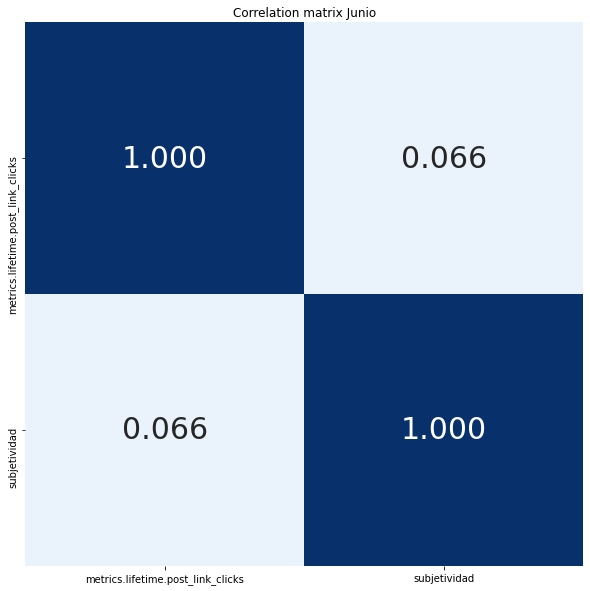

<Figure size 432x288 with 0 Axes>

In [16]:
#matriz de correlación entre el puntaje subjetivo de las noticias y el número de post link clics obtenido
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dfjun.corr(method="pearson"), mask=dfjun.corr(method="pearson") <= -0.5,
            cmap='Blues', norm=colors.Normalize(vmin=0, vmax=1), vmin=0, vmax=1, cbar=False,
            annot=True, fmt='.3f', annot_kws={"size": 30},
             ax=ax)
plt.title("Correlation matrix Junio")
plt.show() #0.066
plt.savefig("corjunio.png")

In [17]:
#MATRIZ DE CORRELACIÓN PARA EVALUAR SI LA SUBJETIVIDAD AFECTÓ EN EL RESULTADO DE LINK CLICKS EN JULIO
dfjul.corr(method="pearson") #0.008479

,metrics.lifetime.post_link_clicks,subjetividad
metrics.lifetime.post_link_clicks,1.000000,0.008479
subjetividad,0.008479,1.000000


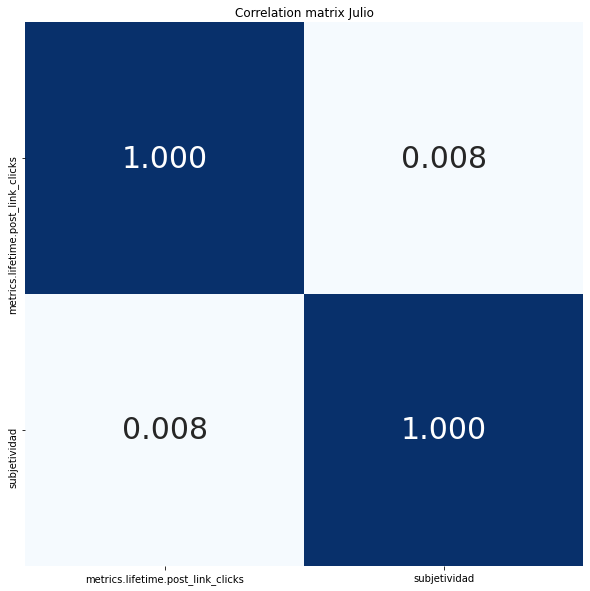

<Figure size 432x288 with 0 Axes>

In [18]:
#matriz de correlación entre el puntaje subjetivo de las noticias y el número de post link clics obtenido EN JULIO
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dfjul.corr(method="pearson"), mask=dfjul.corr(method="pearson") <= -0.5,
            cmap='Blues', norm=colors.Normalize(vmin=0, vmax=1), vmin=0, vmax=1, cbar=False,
            annot=True, fmt='.3f', annot_kws={"size": 30},
             ax=ax)
plt.title("Correlation matrix Julio")
plt.show() #0.008
plt.savefig("corjulio.png")

## LDA

In [13]:
#modelo JUNIO
import gensim
import pyLDAvis
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint

In [14]:
# Crear una representación de los documentos en forma de diccionario
dictionaryjun = Dictionary(dfjun['Pre-Processed'].values)

# Filtrar palabras muy frecuentes o infrecuentes
dictionaryjun.filter_extremes(no_below=5, no_above=0.5)

corpusjun = [dictionaryjun.doc2bow(text) for text in df['Pre-Processed'].values]

# Train the topic model
modeljun = LdaModel(corpus=corpusjun, id2word=dictionaryjun, num_topics=5, passes=500)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
lda_displayjuntest = pyLDAvis.gensim.prepare(modeljun, corpusjun, dictionaryjun, sort_topics=False)
pyLDAvis.display(lda_displayjuntest)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
pyLDAvis.save_html(lda_displayjuntest, 'desktop/archivos/ldajun2.html')

C:\Users\xdiaz\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# Imprimir temas
modeljun.print_topics(num_words=15)

C:\Users\xdiaz\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.672*"trump" + 0.228*"president" + 0.006*"new" + 0.006*"see" + 0.006*"mira" + 0.006*"coronavirus" + 0.006*"look" + 0.006*"could" + 0.006*"muerte" + 0.006*"georgefloyd" + 0.006*"old" + 0.006*"video" + 0.006*"bikini" + 0.006*"photos" + 0.006*"show"'),
 (1,
  '0.406*"could" + 0.242*"show" + 0.197*"georgefloyd" + 0.107*"muerte" + 0.003*"see" + 0.003*"video" + 0.003*"look" + 0.003*"coronavirus" + 0.003*"new" + 0.003*"photos" + 0.003*"mira" + 0.003*"jirafita" + 0.003*"trump" + 0.003*"summer" + 0.003*"old"'),
 (2,
  '0.650*"look" + 0.154*"video" + 0.135*"see" + 0.041*"bikini" + 0.001*"old" + 0.001*"photos" + 0.001*"coronavirus" + 0.001*"show" + 0.001*"networks" + 0.001*"could" + 0.001*"new" + 0.001*"summer" + 0.001*"carlita" + 0.001*"jirafita" + 0.001*"trump"'),
 (3,
  '0.219*"carlita" + 0.219*"photos" + 0.124*"bikini" + 0.116*"summer" + 0.105*"networks" + 0.093*"best" + 0.093*"jirafita" + 0.002*"see" + 0.002*"look" + 0.002*"show" + 0.002*"video" + 0.002*"could" + 0.002*"old" + 0.002

In [28]:
# Compute Perplexity
print('\nPerplexity: ', modeljun.log_perplexity(corpusjun))  # a measure of how good the model is. lower the better.




Perplexity:  -2.952040373260441


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=modeljun, texts=dfjun['Pre-Processed'], dictionary=dictionaryjun, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#resultado con 5 temas y 500 passes: 0.5581791162078277

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5581791162078277


In [30]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpusjun,
                                           id2word=dictionaryjun,
                                           num_topics=6, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=500,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=dfjun['Pre-Processed'], dictionary=dictionaryjun, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#ajuste segun la puntuación de coherencia
import numpy as np
import tqdm
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.utils import ClippedCorpus
from gensim.models import LdaMulticore
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 3
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpusjun)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpusjun, int(num_of_docs*0.75)), 
               corpusjun]
corpus_title = ['75% Corpus', '100% Corpus']
model_resultsjun = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionaryjun, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_resultsjun['Validation_Set'].append(corpus_title[i])
                    model_resultsjun['Topics'].append(k)
                    model_resultsjun['Alpha'].append(a)
                    model_resultsjun['Beta'].append(b)
                    model_resultsjun['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_resultsjun).to_csv('desktop/archivos/lda_tuning_resultsjun.csv', index=False)
    pbar.close()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  1%|▍                                                                               | 3/540 [01:21<4:06:47, 27.57s/it]

In [39]:
#modelo final junio
lda_modeljun = gensim.models.LdaMulticore(corpus=corpusjun,
                                           id2word=dictionaryjun,
                                           num_topics=5, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=500,
                                           alpha=0.61,
                                           eta=0.91)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
lda_displayjun = pyLDAvis.gensim.prepare(lda_modeljun, corpusjun, dictionaryjun, sort_topics=False)
pyLDAvis.display(lda_displayjun)


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
pyLDAvis.save_html(lda_displayjun, 'desktop/archivos/ldajun.html')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
#modelo  julio
# Crear una representación de los documentos en forma de diccionario
dictionaryjul = Dictionary(dfjul['Pre-Processed'].values)

# Filtrar palabras muy frecuentes o infrecuentes
dictionaryjul.filter_extremes(no_below=5, no_above=0.5)

corpusjul = [dictionaryjul.doc2bow(text) for text in df['Pre-Processed'].values]

# Train the topic model
modeljul = LdaModel(corpus=corpusjul, id2word=dictionaryjul, num_topics=5, passes=500)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
lda_displayjul1 = pyLDAvis.gensim.prepare(modeljul, corpusjul, dictionaryjul, sort_topics=False)
pyLDAvis.display(lda_displayjul1)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_ldajul = CoherenceModel(model=modeljul, texts=dfjul['Pre-Processed'], dictionary=dictionaryjul, coherence='c_v')
coherence_ldajul = coherence_model_ldajul.get_coherence()
print('\nCoherence Score: ', coherence_ldajul)

#resultado con 5 temas y 500 passes: 0.30463845177098986

C:\Users\xdiaz\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.30463845177098986


In [23]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_modeljul = gensim.models.LdaMulticore(corpus=corpusjul,
                                           id2word=dictionaryjul,
                                           num_topics=6, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=500,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_ldajul = CoherenceModel(model=lda_modeljul, texts=dfjul['Pre-Processed'], dictionary=dictionaryjul, coherence='c_v')
    
    return coherence_model_ldajul.get_coherence()

C:\Users\xdiaz\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#ajuste segun la puntuación de coherencia
import numpy as np
import tqdm
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.utils import ClippedCorpus
from gensim.models import LdaMulticore
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 3
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpusjul)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpusjul, int(num_of_docs*0.75)), 
               corpusjul]
corpus_title = ['75% Corpus', '100% Corpus']
model_resultsjul = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionaryjul, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_resultsjul['Validation_Set'].append(corpus_title[i])
                    model_resultsjul['Topics'].append(k)
                    model_resultsjul['Alpha'].append(a)
                    model_resultsjul['Beta'].append(b)
                    model_resultsjul['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_resultsjul).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

C:\Users\xdiaz\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
 89%|█████████████████████████████████████████████████████████████████████▎        | 480/540 [3:34:32<26:49, 26.82s/it]


In [47]:
#modelo final julio
lda_modeljul = gensim.models.LdaMulticore(corpus=corpusjul,
                                           id2word=dictionaryjul,
                                           num_topics=5, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=500,
                                           alpha=0.61,
                                           eta=0.01)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
lda_displayjul = pyLDAvis.gensim.prepare(lda_modeljul, corpusjul, dictionaryjul, sort_topics=False)
pyLDAvis.display(lda_displayjul)


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
pyLDAvis.save_html(lda_displayjul, 'desktop/archivos/ldajul.html')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## GSDMM

In [71]:
#inicializar
import numpy as np
from numpy.random import multinomial
from numpy import log, exp
from numpy import argmax
import json

class MovieGroupProcess:
    def __init__(self, K=8, alpha=0.1, beta=0.1, n_iters=30):
        '''
        A MovieGroupProcess is a conceptual model introduced by Yin and Wang 2014 to
        describe their Gibbs sampling algorithm for a Dirichlet Mixture Model for the
        clustering short text documents.
        Reference: http://dbgroup.cs.tsinghua.edu.cn/wangjy/papers/KDD14-GSDMM.pdf
        Imagine a professor is leading a film class. At the start of the class, the students
        are randomly assigned to K tables. Before class begins, the students make lists of
        their favorite films. The teacher reads the role n_iters times. When
        a student is called, the student must select a new table satisfying either:
            1) The new table has more students than the current table.
        OR
            2) The new table has students with similar lists of favorite movies.
        :param K: int
            Upper bound on the number of possible clusters. Typically many fewer
        :param alpha: float between 0 and 1
            Alpha controls the probability that a student will join a table that is currently empty
            When alpha is 0, no one will join an empty table.
        :param beta: float between 0 and 1
            Beta controls the student's affinity for other students with similar interests. A low beta means
            that students desire to sit with students of similar interests. A high beta means they are less
            concerned with affinity and are more influenced by the popularity of a table
        :param n_iters:
        '''
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.n_iters = n_iters

        # slots for computed variables
        self.number_docs = None
        self.vocab_size = None
        self.cluster_doc_count = [0 for _ in range(K)]
        self.cluster_word_count = [0 for _ in range(K)]
        self.cluster_word_distribution = [{} for i in range(K)]

    @staticmethod
    def from_data(K, alpha, beta, D, vocab_size, cluster_doc_count, cluster_word_count, cluster_word_distribution):
        '''
        Reconstitute a MovieGroupProcess from previously fit data
        :param K:
        :param alpha:
        :param beta:
        :param D:
        :param vocab_size:
        :param cluster_doc_count:
        :param cluster_word_count:
        :param cluster_word_distribution:
        :return:
        '''
        mgp = MovieGroupProcess(K, alpha, beta, n_iters=30)
        mgp.number_docs = D
        mgp.vocab_size = vocab_size
        mgp.cluster_doc_count = cluster_doc_count
        mgp.cluster_word_count = cluster_word_count
        mgp.cluster_word_distribution = cluster_word_distribution
        return mgp

    @staticmethod
    def _sample(p):
        '''
        Sample with probability vector p from a multinomial distribution
        :param p: list
            List of probabilities representing probability vector for the multinomial distribution
        :return: int
            index of randomly selected output
        '''
        return [i for i, entry in enumerate(multinomial(1, p)) if entry != 0][0]

    def fit(self, docs, vocab_size):
        '''
        Cluster the input documents
        :param docs: list of list
            list of lists containing the unique token set of each document
        :param V: total vocabulary size for each document
        :return: list of length len(doc)
            cluster label for each document
        '''
        alpha, beta, K, n_iters, V = self.alpha, self.beta, self.K, self.n_iters, vocab_size

        D = len(docs)
        self.number_docs = D
        self.vocab_size = vocab_size

        # unpack to easy var names
        m_z, n_z, n_z_w = self.cluster_doc_count, self.cluster_word_count, self.cluster_word_distribution
        cluster_count = K
        d_z = [None for i in range(len(docs))]

        # initialize the clusters
        for i, doc in enumerate(docs):

            # choose a random  initial cluster for the doc
            z = self._sample([1.0 / K for _ in range(K)])
            d_z[i] = z
            m_z[z] += 1
            n_z[z] += len(doc)

            for word in doc:
                if word not in n_z_w[z]:
                    n_z_w[z][word] = 0
                n_z_w[z][word] += 1

        for _iter in range(n_iters):
            total_transfers = 0

            for i, doc in enumerate(docs):

                # remove the doc from it's current cluster
                z_old = d_z[i]

                m_z[z_old] -= 1
                n_z[z_old] -= len(doc)

                for word in doc:
                    n_z_w[z_old][word] -= 1

                    # compact dictionary to save space
                    if n_z_w[z_old][word] == 0:
                        del n_z_w[z_old][word]

                # draw sample from distribution to find new cluster
                p = self.score(doc)
                z_new = self._sample(p)

                # transfer doc to the new cluster
                if z_new != z_old:
                    total_transfers += 1

                d_z[i] = z_new
                m_z[z_new] += 1
                n_z[z_new] += len(doc)

                for word in doc:
                    if word not in n_z_w[z_new]:
                        n_z_w[z_new][word] = 0
                    n_z_w[z_new][word] += 1

            cluster_count_new = sum([1 for v in m_z if v > 0])
            print("In stage %d: transferred %d clusters with %d clusters populated" % (
            _iter, total_transfers, cluster_count_new))
            if total_transfers == 0 and cluster_count_new == cluster_count and _iter>25:
                print("Converged.  Breaking out.")
                break
            cluster_count = cluster_count_new
        self.cluster_word_distribution = n_z_w
        return d_z

    def score(self, doc):
        '''
        Score a document
        Implements formula (3) of Yin and Wang 2014.
        http://dbgroup.cs.tsinghua.edu.cn/wangjy/papers/KDD14-GSDMM.pdf
        :param doc: list[str]: The doc token stream
        :return: list[float]: A length K probability vector where each component represents
                              the probability of the document appearing in a particular cluster
        '''
        alpha, beta, K, V, D = self.alpha, self.beta, self.K, self.vocab_size, self.number_docs
        m_z, n_z, n_z_w = self.cluster_doc_count, self.cluster_word_count, self.cluster_word_distribution

        p = [0 for _ in range(K)]

        #  We break the formula into the following pieces
        #  p = N1*N2/(D1*D2) = exp(lN1 - lD1 + lN2 - lD2)
        #  lN1 = log(m_z[z] + alpha)
        #  lN2 = log(D - 1 + K*alpha)
        #  lN2 = log(product(n_z_w[w] + beta)) = sum(log(n_z_w[w] + beta))
        #  lD2 = log(product(n_z[d] + V*beta + i -1)) = sum(log(n_z[d] + V*beta + i -1))

        lD1 = log(D - 1 + K * alpha)
        doc_size = len(doc)
        for label in range(K):
            lN1 = log(m_z[label] + alpha)
            lN2 = 0
            lD2 = 0
            for word in doc:
                lN2 += log(n_z_w[label].get(word, 0) + beta)
            for j in range(1, doc_size +1):
                lD2 += log(n_z[label] + V * beta + j - 1)
            p[label] = exp(lN1 - lD1 + lN2 - lD2)

        # normalize the probability vector
        pnorm = sum(p)
        pnorm = pnorm if pnorm>0 else 1
        return [pp/pnorm for pp in p]

    def choose_best_label(self, doc):
        '''
        Choose the highest probability label for the input document
        :param doc: list[str]: The doc token stream
        :return:
        '''
        p = self.score(doc)
        return argmax(p),max(p)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
# Init of the Gibbs Sampling Dirichlet Mixture Model algorithm
mgp = MovieGroupProcess(K=8, alpha=0.1, beta=0.1, n_iters=30)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
docs = dfjun['Pre-Processed']
vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
n_docs = len(docs)

jun = mgp.fit(docs, n_terms)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In stage 0: transferred 75 clusters with 8 clusters populated
In stage 1: transferred 33 clusters with 8 clusters populated
In stage 2: transferred 15 clusters with 8 clusters populated
In stage 3: transferred 18 clusters with 8 clusters populated
In stage 4: transferred 14 clusters with 8 clusters populated
In stage 5: transferred 13 clusters with 8 clusters populated
In stage 6: transferred 12 clusters with 8 clusters populated
In stage 7: transferred 8 clusters with 8 clusters populated
In stage 8: transferred 14 clusters with 8 clusters populated
In stage 9: transferred 11 clusters with 8 clusters populated
In stage 10: transferred 9 clusters with 8 clusters populated
In stage 11: transferred 9 clusters with 8 clusters populated
In stage 12: transferred 12 clusters with 8 clusters populated
In stage 13: transferred 12 clusters with 8 clusters populated
In stage 14: transferred 14 clusters with 8 clusters populated
In stage 15: transferred 13 clusters with 8 clusters populated
In st

In [74]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — — ')

doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)


# Show the top 10 words in term frequency for each cluster 

top_words(mgp.cluster_word_distribution, top_index, 10)

Number of documents per topic : [12 14 18 12 13  8 16  7]
********************
Most important clusters (by number of docs inside): [2 6 1 4 3 0 5 7]
********************
Cluster 2 : [('look', 7), ('health', 4), ('could', 4), ('problems', 3), ('one', 3), ('found', 3), ('people', 3), ('lack', 2), ('watch', 2), ('clashes', 2)]
 — — — — — — — — — 
Cluster 6 : [('look', 6), ('old', 6), ('video', 5), ('photos', 4), ('andrealegarreta', 3), ('years', 3), ('show', 3), ('year', 3), ('networks', 3), ('social', 3)]
 — — — — — — — — — 
Cluster 1 : [('carlita', 7), ('summer', 6), ('jirafita', 5), ('photos', 5), ('share', 4), ('best', 4), ('beach', 4), ('bikini', 4), ('look', 4), ('enjoying', 3)]
 — — — — — — — — — 
Cluster 4 : [('que', 10), ('los', 9), ('por', 6), ('mira', 4), ('ella', 4), ('una', 4), ('esta', 4), ('tiene', 3), ('presidente', 3), ('conoce', 3)]
 — — — — — — — — — 
Cluster 3 : [('coronavirus', 6), ('see', 4), ('new', 4), ('daniel', 4), ('linares', 4), ('true', 3), ('learn', 3), ('say

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
mgp = MovieGroupProcess(K=8, alpha=0.1, beta=0.1, n_iters=30)
docsjul = dfjul['Pre-Processed']
vocabjul = set(x for doc in docsjul for x in doc)
n_termsjul = len(vocabjul)
n_docsjul = len(docsjul)

jul = mgp.fit(docsjul, n_termsjul)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In stage 0: transferred 63 clusters with 8 clusters populated
In stage 1: transferred 28 clusters with 8 clusters populated
In stage 2: transferred 28 clusters with 8 clusters populated
In stage 3: transferred 20 clusters with 8 clusters populated
In stage 4: transferred 17 clusters with 8 clusters populated
In stage 5: transferred 16 clusters with 8 clusters populated
In stage 6: transferred 17 clusters with 8 clusters populated
In stage 7: transferred 24 clusters with 8 clusters populated
In stage 8: transferred 19 clusters with 8 clusters populated
In stage 9: transferred 18 clusters with 8 clusters populated
In stage 10: transferred 17 clusters with 8 clusters populated
In stage 11: transferred 21 clusters with 8 clusters populated
In stage 12: transferred 19 clusters with 8 clusters populated
In stage 13: transferred 11 clusters with 8 clusters populated
In stage 14: transferred 18 clusters with 8 clusters populated
In stage 15: transferred 14 clusters with 8 clusters populated
In

In [76]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — — ')

doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)
# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('Most important clusters (by number of docsjul inside):', top_index)
print('*'*20)
# Show the top 5 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 5)

Number of documents per topic : [11  9 15 17 14 11 10 13]
********************
Most important clusters (by number of docsjul inside): [3 2 4 7 5 0 6 1]
********************
Cluster 3 : [('look', 8), ('old', 8), ('man', 7), ('year', 5), ('tell', 5)]
 — — — — — — — — — 
Cluster 2 : [('coronavirus', 12), ('check', 6), ('find', 5), ('aid', 5), ('details', 4)]
 — — — — — — — — — 
Cluster 4 : [('look', 8), ('photos', 5), ('woman', 4), ('years', 4), ('old', 3)]
 — — — — — — — — — 
Cluster 7 : [('trump', 8), ('see', 3), ('hear', 3), ('listen', 3), ('could', 3)]
 — — — — — — — — — 
Cluster 5 : [('video', 4), ('give', 3), ('would', 3), ('expert', 3), ('cjng', 3)]
 — — — — — — — — — 
Cluster 0 : [('people', 4), ('case', 4), ('confirmed', 4), ('china', 4), ('another', 4)]
 — — — — — — — — — 
Cluster 6 : [('look', 6), ('lady', 3), ('video', 3), ('bikini', 3), ('watch', 2)]
 — — — — — — — — — 
Cluster 1 : [('year', 5), ('old', 4), ('learn', 3), ('daughter', 2), ('talent', 2)]
 — — — — — — — — — 


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Nube de palabras

In [51]:
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

C:\Users\xdiaz\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\xdiaz\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


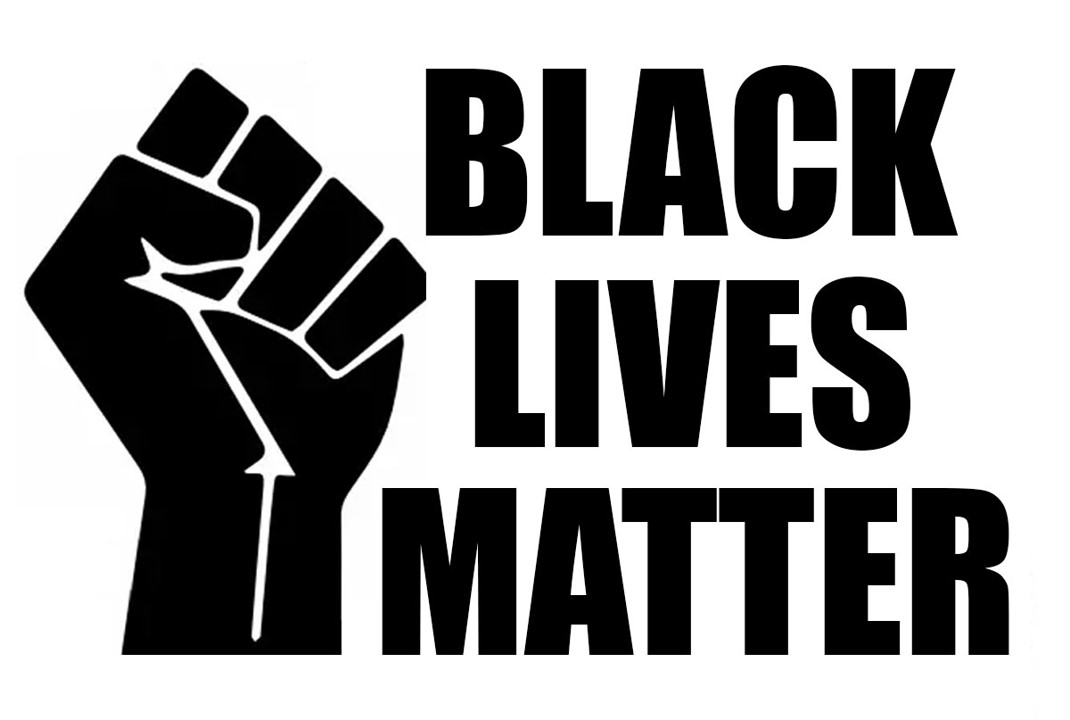

In [53]:
blacklivesmatter = PIL.Image.open("desktop/archivos/blacklivesmatter.jpg")

display(blacklivesmatter)

In [54]:
maskjun = np.array(blacklivesmatter)



C:\Users\xdiaz\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\xdiaz\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


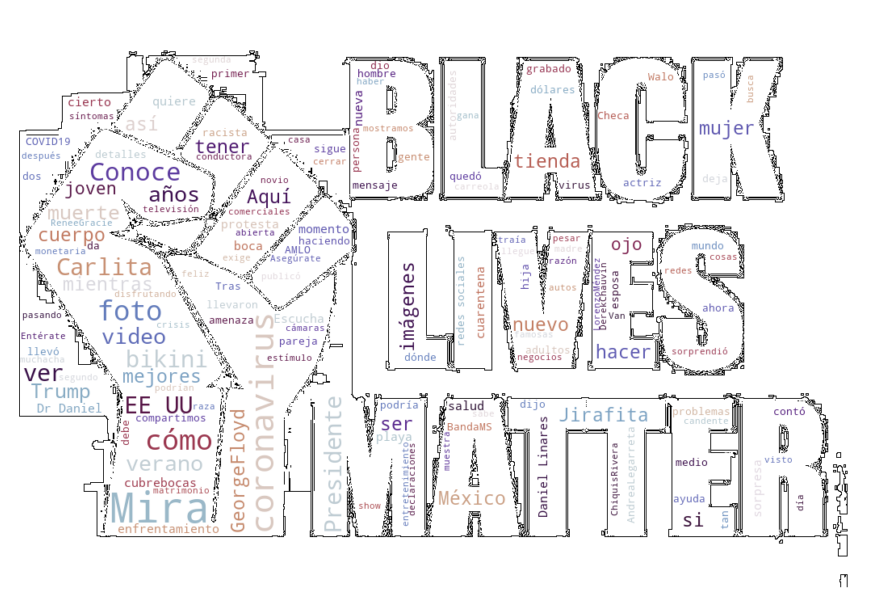

In [55]:
palabrasjun = dfjun.text.str.cat(sep=' ')

wordcloudjun = WordCloud(random_state=1234, width=500, height=500,
                      max_font_size=200, max_words=150,
                      background_color='white', colormap='twilight',
                      stopwords=stopwords, 
                      mask=maskjun, contour_width=0.5, contour_color='black').generate(palabrasjun) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloudjun.to_file("desktop/archivos/mapjun.jpg")


plt.figure(figsize=(12,10))
plt.imshow(wordcloudjun, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


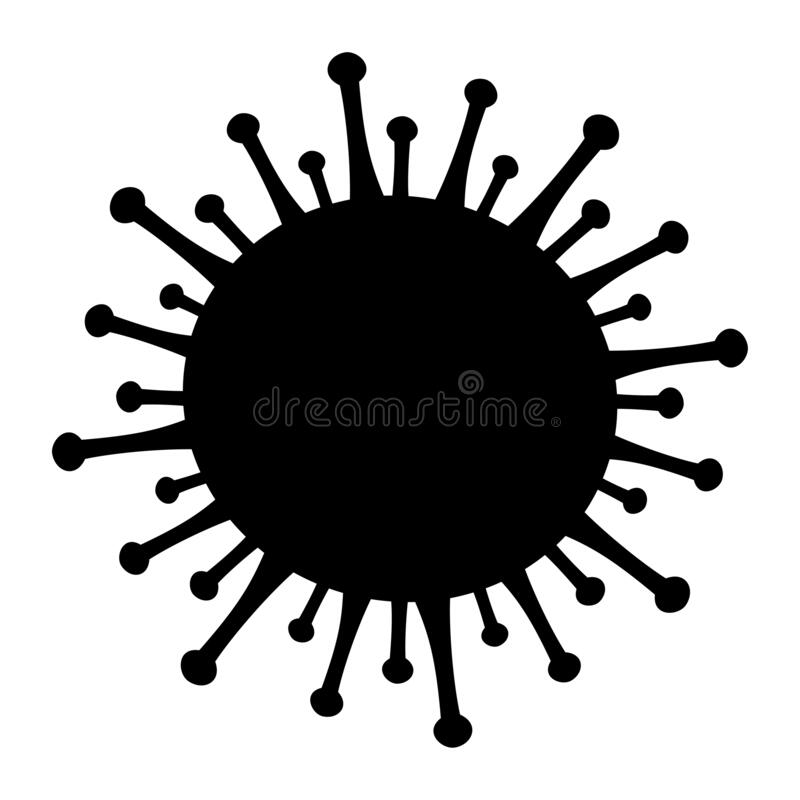

In [91]:
#nube julio
covid19 = PIL.Image.open("desktop/archivos/covid19.jpg")

display(covid19)

maskjul = np.array(covid19)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


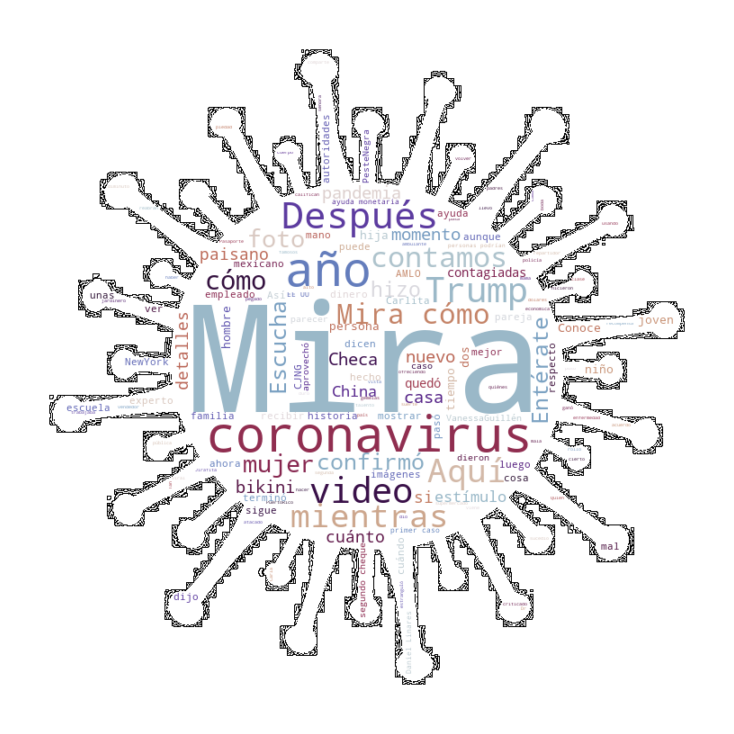

In [92]:
palabrasjul = dfjul.text.str.cat(sep=' ')

wordcloudjul = WordCloud(random_state=1234, width=500, height=500,
                      max_font_size=200, max_words=150,
                      background_color='white', colormap='twilight',
                      stopwords=stopwords, 
                      mask=maskjul, contour_width=0.5, contour_color='black').generate(palabrasjul) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloudjul.to_file("desktop/archivos/mapjul.jpg")


plt.figure(figsize=(12,10))
plt.imshow(wordcloudjul, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## ANÁLISIS DE SENTIMIENTO

In [4]:
from sentiment_analysis_spanish import sentiment_analysis

sentiment = sentiment_analysis.SentimentAnalysisSpanish()


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
classifier = TextClassifier.load('sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

dfjun['sent_flair'] = dfjun['text'].apply(lambda valor: sent_flair(valor))
data.head()

In [ ]:
dfjul['sent_flair'] = dfjul['text'].apply(lambda valor: sent_flair(valor))
data.head()

In [ ]:
dfjun[['text', 'sent_flair']].sort_values('sent_flair')

In [ ]:
dfjul[['text', 'sent_flair']].sort_values('sent_flair')

## Emojis más usados


In [15]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    dfjun = regex.findall(r'\X', text)
    for word in dfjun:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

dfjun['emojis'] = dfjun['text'].apply(lambda text: get_emojis(text))

In [16]:
dfjun.head()

,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks,ing,ingles,subjetividad,Pre-Processed,emojis
309,LINK,Hoy es el primer día de verano ☀😎 y queremos compartirte las famosas que encienden las redes con sus mejores bikinis 👙🔥😏,https://www.facebook.com/554069604681993/posts/3296802107075382/,2020-06-20T15:00:44Z,427921,"Translated(src=es, dest=en, text=Today is the first day of summer ☀😎 and we want to share with you the famous women who turn on the networks with their best bikinis 👙🔥😏, pronunciation=Today is the first day of summer ☀😎 and we want to share with you the famous women who turn on the networks with their best bikinis 👙🔥😏, extra_data=""{'translat..."")",Today is the first day of summer ☀😎 and we want to share with you the famous women who turn on the networks with their best bikinis 👙🔥😏,0.544444,"[today, first, day, summer, want, share, famous, women, turn, networks, best, bikinis]","[☀, 😎, 👙, 🔥, 😏]"
408,LINK,¿Es #KimKardashian o #AndreaLegarreta? 😍 La conductora de televisión nos sorprendió al dejarse ver con muy poquita ropa 🔥📸👇,https://www.facebook.com/554069604681993/posts/3260996557322604/,2020-06-07T15:00:19Z,319572,"Translated(src=es, dest=en, text=Is it #KimKardashian or #AndreaLegarreta? 😍 The television host surprised us by being seen with very little clothes po, pronunciation=[[]], extra_data=""{'translat..."")",Is it #KimKardashian or #AndreaLegarreta? 😍 The television host surprised us by being seen with very little clothes po,0.775000,"[kimkardashian, andrealegarreta, television, host, surprised, seen, little, clothes]","[😍, 🔥, 📸, 👇]"
449,LINK,🔥 No ha empezado el verano y 'La Jirafita' Carla Medrano ya nos dio un adelanto de lo que veremos 👙 😏 Checa estas fotos que encendieron las redes 📸,https://www.facebook.com/554069604681993/posts/3244365688985691/,2020-06-01T14:30:11Z,267167,"Translated(src=es, dest=en, text=🔥 Summer has not started and 'La Jirafita' Carla Medrano already gave us a preview of what we will see 👙 😏 Check out these photos that lit the networks 📸, pronunciation=🔥 Summer has not started and 'La Jirafita' Carla Medrano already gave us a preview of what we will see 👙 😏 Check out these photos that lit the networks 📸, extra_data=""{'translat..."")",🔥 Summer has not started and 'La Jirafita' Carla Medrano already gave us a preview of what we will see 👙 😏 Check out these photos that lit the networks 📸,0.000000,"[summer, started, jirafita, carla, medrano, already, gave, preview, see, check, photos, lit, networks]","[🔥, 👙, 😏, 📸]"
283,LINK,🔥 ¿Logrará #AleidaNúñez quitarle el título de ‘Bombón Asesino’ a #NinelConde? 👙 🤔 Mira las candentes fotos y elige tu favorita 👇 📸,https://www.facebook.com/554069604681993/posts/3308033589285567/,2020-06-24T14:30:16Z,125226,"Translated(src=es, dest=en, text=🔥 Will # AleidaNúñez succeed in taking away the title of ‘Bombón Asesino’ from #NinelConde? 👙 🤔 Look at the hot photos and choose your favorite 👇 📸, pronunciation=[[]], extra_data=""{'translat..."")",🔥 Will # AleidaNúñez succeed in taking away the title of ‘Bombón Asesino’ from #NinelConde? 👙 🤔 Look at the hot photos and choose your favorite 👇 📸,0.925000,"[aleidanúñez, succeed, taking, away, title, bombón, asesino, ninelconde, look, hot, photos, choose, favorite]","[🔥, 👙, 🤔, 👇, 📸]"
242,LINK,¡Carlita sabe cómo moverlo! 💃 😍 En este video te mostramos los mejores pasos de La Jirafita 🎥,https://www.facebook.com/554069604681993/posts/3322886177800308/,2020-06-29T16:30:14Z,79220,"Translated(src=es, dest=en, text=Carlita knows how to move it! 💃 😍 In this video we show you the best steps of La Jirafita 🎥, pronunciation=[[]], extra_data=""{'translat..."")",Carlita knows how to move it! 💃 😍 In this video we show you the best steps of La Jirafita 🎥,0.300000,"[carlita, knows, move, video, show, best, steps, jirafita]","[💃, 😍, 🎥]"


In [17]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [18]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(dfjun.emojis.values,[])).keys(),Counter(sum(dfjun.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
7,👇,34
10,🎥,30
6,📸,23
3,🔥,19
2,👙,12


In [19]:
trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [21]:
dfjul['emojis'] = dfjul['text'].apply(lambda text: get_emojis(text))
dfjul.head()

,content_category,text,perma_link,created_time,metrics.lifetime.post_link_clicks,ing,ingles,subjetividad,Pre-Processed,emojis
104,LINK,#JoanSebastian le hizo una petición muy especial a #MaribelGuardia días antes de morir 😢 Esto contó sobre el último deseo del 'Rey del Jaripeo' 📸,https://www.facebook.com/554069604681993/posts/3373575379398054/,2020-07-17T14:30:13Z,95143,"Translated(src=es, dest=en, text=#JoanSebastian made a very special request to #MaribelGuardia days before he died 😢 This told about the last wish of the 'King of Jaripeo' 📸, pronunciation=#JoanSebastian made a very special request to #MaribelGuardia days before he died 😢 This told about the last wish of the 'King of Jaripeo' 📸, extra_data=""{'translat..."")",#JoanSebastian made a very special request to #MaribelGuardia days before he died 😢 This told about the last wish of the 'King of Jaripeo' 📸,0.404762,"[joansebastian, made, special, request, maribelguardia, days, died, told, last, wish, king, jaripeo]","[😢, 📸]"
9,LINK,"¡Hay que bajarle a los ejercicios de la pompa, Carlita! 😅 A La Jirafita se le rompió el zipper de la falda, dejando ver su ropa interior 🙈 Mira quién salió a su rescate 🎥⬇️",https://www.facebook.com/554069604681993/posts/3412757722146486/,2020-07-30T19:30:19Z,61200,"Translated(src=es, dest=en, text=You have to get down to pomp exercises, Carlita! 😅 La Jirafita broke the zipper on her skirt, revealing her underwear 🙈 Look who came to her rescue 🎥⬇️, pronunciation=[[]], extra_data=""{'translat..."")","You have to get down to pomp exercises, Carlita! 😅 La Jirafita broke the zipper on her skirt, revealing her underwear 🙈 Look who came to her rescue 🎥⬇️",0.288889,"[get, pomp, exercises, carlita, jirafita, broke, zipper, skirt, revealing, underwear, look, came, rescue]","[😅, 🙈, 🎥, ⬇️]"
216,LINK,La abogada de #VanessaGuillén reveló que fue asesinada con un martillo y descuartizada 😔💔 Aquí te compartimos los últimos detalles del caso de la soldado de 20 años 👇,https://www.facebook.com/554069604681993/posts/3331822603573332/,2020-07-02T21:51:05Z,57788,"Translated(src=es, dest=en, text=# VanessaGuillén's lawyer revealed that she was killed with a hammer and dismembered 😔💔 Here we share the latest details of the case of the 20-year-old soldier 👇, pronunciation=# VanessaGuillén's lawyer revealed that she was killed with a hammer and dismembered 😔💔 Here we share the latest details of the case of the 20-year-old soldier 👇, extra_data=""{'translat..."")",# VanessaGuillén's lawyer revealed that she was killed with a hammer and dismembered 😔💔 Here we share the latest details of the case of the 20-year-old soldier 👇,0.450000,"[vanessaguillén, lawyer, revealed, killed, hammer, dismembered, share, latest, details, case, year, old, soldier]","[😔, 💔, 👇]"
88,LINK,"¡Cómo olvidarla en las telenovelas! 🤩📺 A sus 41 años, #AdrianaFonseca deslumbra con su belleza 😍 y aquí te contamos a qué se dedica ahora ⬇",https://www.facebook.com/554069604681993/posts/3374838622605063/,2020-07-19T16:00:27Z,33674,"Translated(src=es, dest=en, text=How to forget her in soap operas! 🤩📺 At 41 years old, #AdrianaFonseca dazzles with her beauty 😍 and here we tell you what she does now ⬇, pronunciation=[[]], extra_data=""{'translat..."")","How to forget her in soap operas! 🤩📺 At 41 years old, #AdrianaFonseca dazzles with her beauty 😍 and here we tell you what she does now ⬇",0.200000,"[forget, soap, operas, years, old, adrianafonseca, dazzles, beauty, tell]","[🤩, 📺, 😍, ⬇]"
134,LINK,🎥 ¡Todavía se pone los moños! 😅 A un hombre le ofrecen un trabajo de ‘yardero’ y lo rechazó por este motivo 👇🏼,https://www.facebook.com/554069604681993/posts/3362588430496749/,2020-07-13T19:30:32Z,28783,"Translated(src=es, dest=en, text=🎥 She still puts on her bows! 😅 A man is offered a ‘yard’ job and he was turned down for this reason 👇🏼, pronunciation=[[]], extra_data=""{'translat..."")",🎥 She still puts on her bows! 😅 A man is offered a ‘yard’ job and he was turned down for this reason 👇🏼,0.288889,"[still, put

In [22]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(dfjul.emojis.values,[])).keys(),Counter(sum(dfjul.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
4,🎥,45
12,⬇,23
8,👇,19
15,👀,17
1,📸,15


In [23]:
trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)